<img src= https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/110/original/Screenshot_2023-08-16_at_6.03.47_PM.png?1692189250 width=800>

In [56]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score

In [57]:
data = datasets.load_diabetes()

In [58]:
X = data['data']
y = data['target']

In [59]:
df = pd.DataFrame( data['data'], columns=data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [60]:
df['target'] = y

C:\Users\Upendra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

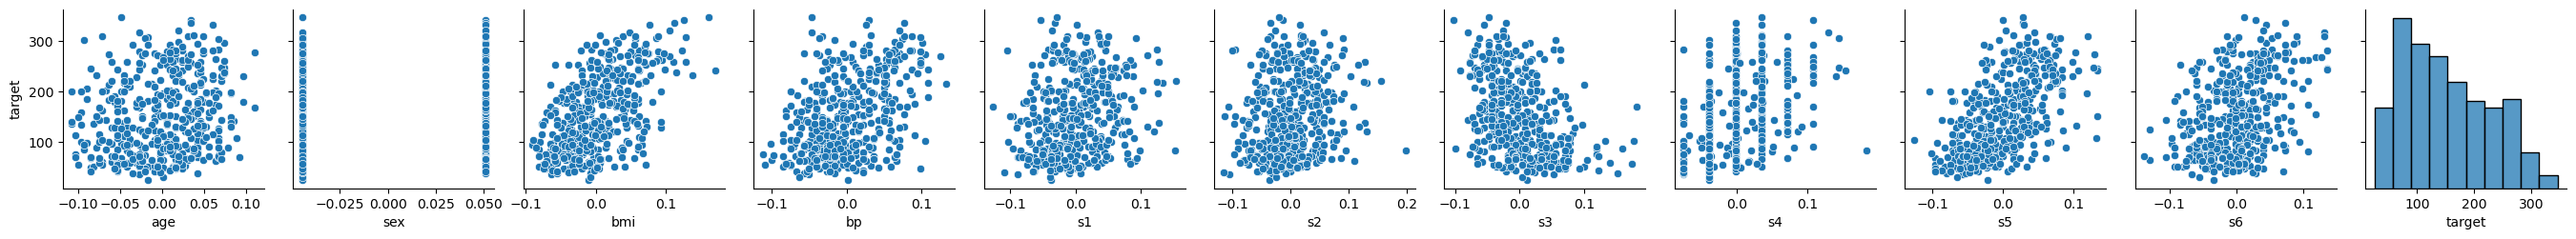

In [62]:
plt.figure(tight_layout= True)
sns.pairplot(df, y_vars='target')

<Axes: >

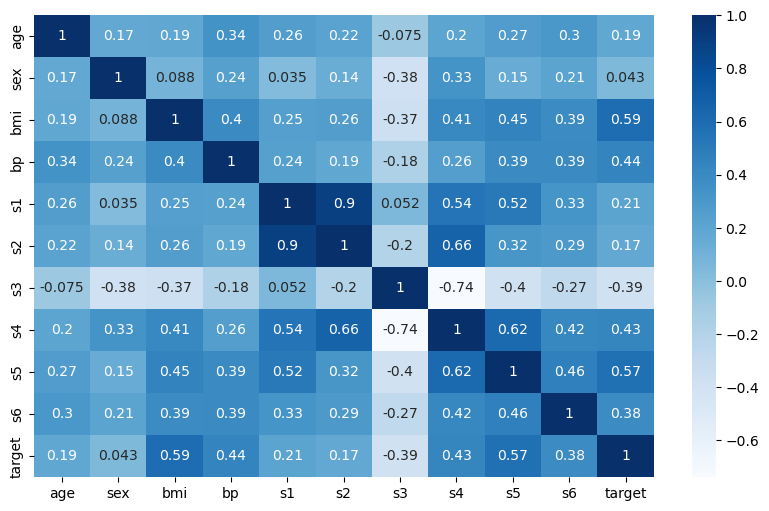

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [9]:
# Transform the features into polynomial features
degree = 25
PolynomialFeatures(degree)

PolynomialFeatures(degree=25)

In [33]:
degree = 10
poly  = PolynomialFeatures(degree = degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [53]:
X_train_poly.shape

(353, 184756)

In [54]:
X_test_poly.shape

(89, 184756)

In [23]:
pd.DataFrame(X_test_poly).head()

,0,1,2,3,4,5,6,7,8,9,...,7998,7999,8000,8001,8002,8003,8004,8005,8006,8007
0,1.0,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,...,-5.132455e-12,8.260404e-13,-1.329467e-13,1.163773e-09,-1.873029e-10,3.014538e-11,-4.851733e-12,7.808598e-13,-1.256751e-13,2.022672e-14
1,1.0,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,...,2.071062e-10,2.004074e-10,1.939252e-10,1.303193e-10,1.261041e-10,1.220253e-10,1.180783e-10,1.142591e-10,1.105634e-10,1.069872e-10
2,1.0,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,...,1.016842e-10,-2.123682e-11,4.435327e-12,3.638137e-07,-7.598279e-08,1.586907e-08,-3.314268e-09,6.921875e-10,-1.445639e-10,3.019230e-11
3,1.0,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,...,3.129879e-07,1.937102e-07,1.198885e-07,9.215764e-07,5.703694e-07,3.530052e-07,2.184772e-07,1.352169e-07,8.368658e-08,5.179415e-08
4,1.0,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,...,-7.443823e-13,-1.355228e-12,-2.467339e-12,1.848794e-14,3.365930e-14,6.128038e-14,1.115675e-13,2.031208e-13,3.698032e-13,6.732667e-13


In [71]:
# Standize the poly

In [34]:
scalar = StandardScaler()
X_train_poly_scaled = scalar.fit_transform(X_train_poly)
X_test_poly_scaled = scalar.fit_transform(X_test_poly)

In [15]:
pd.DataFrame(X_test_poly_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.0,0.981895,-0.924211,0.014028,-0.258553,2.619284,2.571899,0.307525,0.763260,0.801711,...,-0.623682,0.970984,0.815378,0.183828,-0.323307,-0.123463,-0.418774,-0.469823,-0.437102,-0.699502
1,0.0,1.890011,-0.924211,0.905792,0.606353,-0.579315,-0.418562,-0.063339,-0.810107,-0.380746,...,-0.732269,0.692679,0.522558,0.224816,-0.202667,-0.221352,0.054656,-0.696185,-0.148020,-0.537914
2,0.0,1.331170,1.082004,0.058616,-0.179925,2.149765,0.961143,1.049253,-0.023424,1.921984,...,0.194186,0.646465,2.696163,-0.253762,-0.692319,-0.706840,-0.316386,2.059004,-1.016093,-0.596897
3,0.0,1.959866,-0.924211,1.217909,1.917079,1.122692,0.703686,-1.620967,3.044643,2.226621,...,0.998193,-3.663564,-2.924819,-2.069258,5.602579,5.496105,3.592150,3.136107,2.275547,0.636712
4,0.0,0.353200,1.082004,-0.275796,0.055958,0.770552,1.053563,-0.211684,0.763260,-0.006863,...,-0.719639,0.613858,0.546079,0.263550,-0.323307,-0.688178,-0.483492,-0.895831,-0.341850,-0.677691


In [84]:
# Use LinerRegression to predict

In [52]:
lr = LinearRegression()
lr.fit(X_train_poly_scaled, y_train)
pred = lr.predict(X_test_poly_scaled)
print("mse for test ", mean_squared_error(y_test, pred))

# mse on train
pred = lr.predict(X_train_poly_scaled)
print("mse for train ", mean_squared_error(y_train, pred))

mse for test  380430.3118809429
mse for train  2.316297411655852e-22


In [87]:
## taking MSE as metric instead of Adj.R-sq

* overfitted model - there are high variance 

In [82]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
adj_r2_ridge = 1 - ((1 - r2_ridge) * (n - 1) / (n - p - 1))

In [46]:
lasso_model = Lasso(alpha=0.15)
ridge_model = Ridge(alpha=0.15)

In [107]:
# Fit the models to the training data

In [47]:
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

C:\Users\Upendra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+04, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


Ridge(alpha=0.15)

In [50]:
lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

test MSE for L1: 9612.13838078513
test MSE for L2: 360517.78488038544
